In [46]:
import pandas as pd
import numpy as np

In [47]:
c_size=100000
col_list = (['arr_port', 'pax','year','arr_city'])
short_bookings = pd.read_csv("~/Data/challenge/bookings.csv",nrows=10000,sep = '^',usecols=col_list)

In [48]:
short_bookings = short_bookings[short_bookings['year'] == 2013]
short_bookings

,arr_port,arr_city,pax,year
0,LHR,LON,-1,2013
1,CLT,CLT,1,2013
2,CLT,CLT,1,2013
3,SVO,MOW,1,2013
4,SVO,MOW,1,2013
5,LGA,NYC,1,2013
6,LGA,NYC,1,2013
7,SIN,SIN,2,2013
8,SIN,SIN,2,2013
9,SIN,SIN,2,2013


In [99]:
short_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
arr_port    10000 non-null object
arr_city    10000 non-null object
pax         10000 non-null int64
year        10000 non-null int64
dtypes: int64(2), object(2)
memory usage: 390.6+ KB


### **Antes de entrar en materia, es necesario realizar un analisis de los campos buscando NaN, espacios, min y may, etc**

**PROBLEMA: En la columna de 'arr_port' encontramos espacios que pueden llevar a error en el futuro**

In [100]:
for i, r in enumerate(short_bookings['arr_port']):  
    r1 = r.strip()
    short_bookings.at[i, 'arr_port'] = r1
    
for i in short_bookings['arr_port']:
    print(len(i))
# Como haremos un GROUPBY por esa columna, sí nos importa que esté correcta de formato
# 'arr_port' también tiene espacios pero no filtraremos por ella, la dejamos así

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [13]:
# LA FORMA ARRIBA RESUELTA NO ES EFICIENTE. HAY QUE TRABAJAR CON PANDAS!!:

In [49]:
short_bookings['arr_port'].str.strip()

0       LHR
1       CLT
2       CLT
3       SVO
4       SVO
5       LGA
6       LGA
7       SIN
8       SIN
9       SIN
10      SIN
11      SIN
12      SIN
13      SIN
14      SIN
15      SIN
16      SIN
17      SIN
18      SIN
19      TUS
20      CTA
21      CTA
22      YWG
23      YWG
24      YWG
25      YWG
26      YWG
27      YWG
28      YWG
29      YWG
       ... 
9970    XQP
9971    YVR
9972    GMP
9973    NRT
9974    NRT
9975    NRT
9976    NRT
9977    LHR
9978    LHR
9979    LHR
9980    LHR
9981    ARN
9982    ARN
9983    MRS
9984    SBZ
9985    SBZ
9986    DXB
9987    DXB
9988    DXB
9989    DXB
9990    DXB
9991    DXB
9992    TRD
9993    TRD
9994    HAN
9995    HAN
9996    HAN
9997    SGN
9998    SGN
9999    SGN
Name: arr_port, Length: 10000, dtype: object

**PROBLEMA: En la columna de 'arr_city' encontramos espacios que pueden llevar a error en el futuro**

In [50]:
short_bookings['arr_city'].values
len(short_bookings['arr_city'][0])

8

In [102]:
for i, r in enumerate(short_bookings['arr_city']):  
    r1 = r.strip()
    short_bookings.at[i, 'arr_city'] = r1
    
for i in short_bookings['arr_city']:
    print(len(i))

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [13]:
# LA FORMA ARRIBA RESUELTA NO ES EFICIENTE. HAY QUE TRABAJAR CON PANDAS!!:

In [51]:
short_bookings['arr_city'].str.strip()

0       LON
1       CLT
2       CLT
3       MOW
4       MOW
5       NYC
6       NYC
7       SIN
8       SIN
9       SIN
10      SIN
11      SIN
12      SIN
13      SIN
14      SIN
15      SIN
16      SIN
17      SIN
18      SIN
19      TUS
20      CTA
21      CTA
22      YWG
23      YWG
24      YWG
25      YWG
26      YWG
27      YWG
28      YWG
29      YWG
       ... 
9970    XQP
9971    YVR
9972    SEL
9973    TYO
9974    TYO
9975    TYO
9976    TYO
9977    LON
9978    LON
9979    LON
9980    LON
9981    STO
9982    STO
9983    MRS
9984    SBZ
9985    SBZ
9986    DXB
9987    DXB
9988    DXB
9989    DXB
9990    DXB
9991    DXB
9992    TRD
9993    TRD
9994    HAN
9995    HAN
9996    HAN
9997    SGN
9998    SGN
9999    SGN
Name: arr_city, Length: 10000, dtype: object

Hasta aquí, las columas 'arr_city' y 'arr_port' ya no poseen espacios en blanco.

**COMPROBACION: Tenemos que comprobar si existe algun NaN en el dataframe:**

Esta comprobación tendrá que realizarse a todos los chunks del data frame

In [103]:
# Para este ejercicio solo nos interesanlas columnas 'arr_city','arr_port' y 'pax':

arr_port_null = short_bookings['arr_port'].isnull().values.sum()
if (arr_port_null != 0):
    short_bookings['arr_port'].dropna()

# Como dropna te elimina la fila en la qu encuentre un NaN no hace falta comprobar el resto de columnas

In [90]:
# Ejemplo para ver como funciona DROPNA()
df = pd.DataFrame({'a':[None, 3, None, 5, 6], 'b':[1, 3, 4, 6, None], 'c':[54, None, None, 32, 21]})

In [112]:
df.isnull().values.any()

True

In [113]:
df.dropna()

,a,b,c
3,5.0,6.0,32.0


**UNA VEZ COMPROBADO EL FORMATO DE LAS COLUMNAS DE INTERES, PROCEDO A LA RESOLUCION DEL EJERCICIO EN UN FRAGMENDO DE 10k FILAS**

**Tenemos que hacer: Top 10 arrival airports in the world in 2013 (using the bookings file)
Trabajaré primero sobre una parte acotada del data frame e intentaré extrapolarlo al global del data frame**

In [52]:
shorted = short_bookings.groupby(['arr_port'])['pax'].sum().sort_values(ascending=False)

In [56]:
shorted.head(10)

arr_port
HKG         112
LGA          95
ORD          94
JFK          92
SFO          91
LAX          91
MCO          90
DCA          82
DEN          79
LHR          76
Name: pax, dtype: int64

In [76]:
sol = pd.DataFrame(shorted.head(10))
sol

,,pax
arr_port,arr_city,
HKG,HKG,112
LGA,NYC,95
ORD,CHI,94
JFK,NYC,92
SFO,SFO,91
LAX,LAX,91
MCO,ORL,90
DCA,WAS,82
DEN,DEN,79


In [80]:
sol2 = pd.DataFrame(shorted.tail(10))
sol2

,,pax
arr_port,arr_city,
MAO,MAO,-6
STS,STS,-6
AYT,AYT,-6
ABZ,ABZ,-6
KSN,KSN,-6
PSA,PSA,-8
DPS,DPS,-9
ASU,ASU,-10
IKA,THR,-10


In [81]:
sol.append(sol2)

,,pax
arr_port,arr_city,
HKG,HKG,112
LGA,NYC,95
ORD,CHI,94
JFK,NYC,92
SFO,SFO,91
LAX,LAX,91
MCO,ORL,90
DCA,WAS,82
DEN,DEN,79


**Una vez realizado para un numero concreto de filas tenemos que realizarlo para todo el data frame usando chunks**

### **SOLUCIÓN EJERCICIO 2**

In [7]:
top10 = pd.DataFrame()
count = 0

for gm_chunk in pd.read_csv("~/Data/challenge/bookings.csv",chunksize=c_size,sep = '^',usecols=col_list):
   
    # Selecciono el año 2013
    gm_chunk = gm_chunk[gm_chunk['year'] == 2013]
    
    # Compruebo si hay NaN y elimino en caso de haber
    if (gm_chunk.isnull().values.any() == True):
        gm_chunk = gm_chunk.dropna()

    # Compruebo los espacios en 'arr_port' para hacer groupby y elimino en caso de haber
    gm_chunk['arr_port'].str.strip()
    gm_chunk['arr_city'].str.strip()
    
    # Comprobaciones hechas, agrupo con groupby, ordeno con sort_values y muestro con head(10)
    #shorted = gm_chunk.groupby(['arr_port','arr_city'])['pax'].sum().sort_values(ascending=False)
    shorted = gm_chunk.groupby(['arr_port']).sum().sort_values('pax',ascending=False)
    del shorted['year']
    
    # Esto es solo para un chunk del data frame original. A continuación se realiza para el resto de chunks, teniendo 
    # que almacenar el contenido en un nuevo data frame.
    top10 = top10.append(shorted.head(10))
    # De esta forma, en top10 tendremos los 10 mas concurridos pudiendo tener repetidos ya que analizamos por fracciones del data set original
    

# Finalmente, realizo un nuevo groupby por 'arr_port' en el nuevo data frame generado con el objetivo de anular repetidos
# y mostrar el top10 de todo el conjunto de datos 
#global_top10 = top10.reset_index().groupby(['arr_port'])['pax'].sum().sort_values(ascending=False).reset_index()
#global_top10.head(10)
sol = top10.groupby(['arr_port'])['pax'].sum().sort_values(ascending=False).reset_index()
sol.head(10)

,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAS,69630.0
3,LAX,65570.0
4,CDG,64490.0
5,JFK,61460.0
6,SFO,53290.0
7,BKK,49320.0
8,DXB,44930.0
9,MIA,43970.0


### **SOLUCIÓN EJERCICIO 1**

In [45]:
for gm_chunk in pd.read_csv("~/Data/challenge/bookings.csv",chunksize=c_size,sep = '^',usecols=col_list):
    print(gm_chunk.shape)

(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(500000, 3)
(10, 3)


### **SOLUCIÓN EJERCICIO 3**

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

In [44]:
col_list=['Date','Time','Destination']
searches = pd.read_csv('searches.csv.bz2',compression='bz2',nrows=10000,sep='^',usecols=col_list)

In [45]:
searches

,Date,Time,Destination
0,2013-01-01,20:25:57,AUH
1,2013-01-01,10:15:33,MIL
2,2013-01-01,18:04:49,SFO
3,2013-01-01,17:42:40,ARN
4,2013-01-01,17:48:29,MAD
5,2013-01-01,22:00:28,BLR
6,2013-01-01,10:47:14,PAR
7,2013-01-01,23:39:49,DUB
8,2013-01-01,17:08:46,ACE
9,2013-01-01,19:57:57,BGW


In [61]:
# He separado el mes de la fecha completa
searches["Month"] = pd.DatetimeIndex(searches["Date"]).month
searches

,Date,Time,Destination,Month
0,2013-01-01,20:25:57,AUH,1
1,2013-01-01,10:15:33,MIL,1
2,2013-01-01,18:04:49,SFO,1
3,2013-01-01,17:42:40,ARN,1
4,2013-01-01,17:48:29,MAD,1
5,2013-01-01,22:00:28,BLR,1
6,2013-01-01,10:47:14,PAR,1
7,2013-01-01,23:39:49,DUB,1
8,2013-01-01,17:08:46,ACE,1
9,2013-01-01,19:57:57,BGW,1


In [182]:
grouped = searches.groupby(['Destination','Month'])['Time'].count()
grouped = pd.DataFrame(grouped)
grouped = grouped.reset_index()
grouped

,Destination,Month,Time
0,AAL,1,2
1,AAQ,1,1
2,ABE,1,2
3,ABJ,1,2
4,ABQ,1,4
5,ABT,1,2
6,ABV,1,1
7,ABX,1,1
8,ABZ,1,5
9,ACA,1,1


In [183]:
condition1 = grouped['Destination'] == 'MAD'
condition2 = grouped['Destination'] == 'AGP'
condition3 = grouped['Destination'] == 'BCN'

df_toplot = pd.DataFrame()
df_toplot = grouped.where(condition1).dropna()
df_toplot = df_toplot.append(grouped.where(condition2).dropna())
df_toplot = df_toplot.append(grouped.where(condition3).dropna())
df_toplot

,Destination,Month,Time
552,MAD,1.0,125.0
26,AGP,1.0,48.0
78,BCN,1.0,162.0


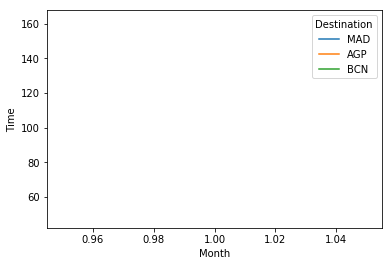

In [155]:
sns.lineplot(data=df_toplot, x='Month', y='Time', hue='Destination');